In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#preparing image datasets from directories for training and validation purposes

train_ds = keras.utils.image_dataset_from_directory(
    directory= "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory= "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Data preprocessing: Normalizing pixel values to [0, 1] range
def process(image,lable):
  image = tf.cast(image/255., tf.float32) # Normalize pixel values
  return image, lable

# Applying normalization to training dataset
train_ds = train_ds.map(process)
# Applying normalization to validation dataset
valid_ds = valid_ds.map(process)

In [ ]:
# Model architecture is designed for image classification tasks, particularly in distinguishing between cat and dog images. It consists of convolutional layers followed by max pooling for feature extraction,
# batch normalization for stability, and dropout layers for regularization to prevent overfitting. The architecture culminates in a densely connected layer with a sigmoid activation function for binary classification.
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer="adam",
              loss = 'binary_crossentropy',
              metrics= ['accuracy']
              )

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data= valid_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.5446 - accuracy: 0.5899 - val_loss: 0.6704 - val_accuracy: 0.6358
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5819 - accuracy: 0.6945 - val_loss: 0.5964 - val_accuracy: 0.6888
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5248 - accuracy: 0.7301 - val_loss: 0.5650 - val_accuracy: 0.6830
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4884 - accuracy: 0.7517 - val_loss: 0.7882 - val_accuracy: 0.5790
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4014 - accuracy: 0.7997 - val_loss: 0.4351 - val_accuracy: 0.8070
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3381 - accuracy: 0.8426 - val_loss: 0.5874 - val_accuracy: 0.7544
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2745 - accuracy: 0.8745 - val_loss: 0.4951 - val_ac

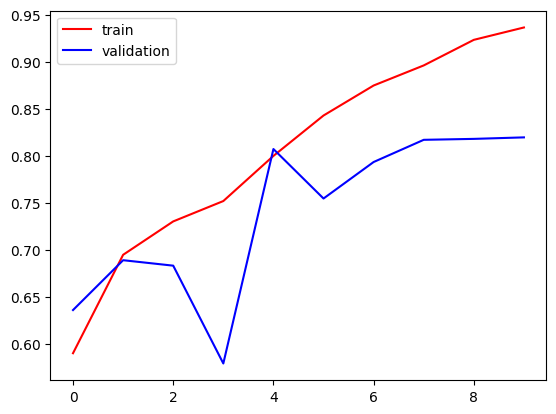

In [ ]:
#plots training and validation accuracy to assess model performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label ='train')
plt.plot(history.history['val_accuracy'],color='blue',label ='validation')
plt.legend()
plt.show()

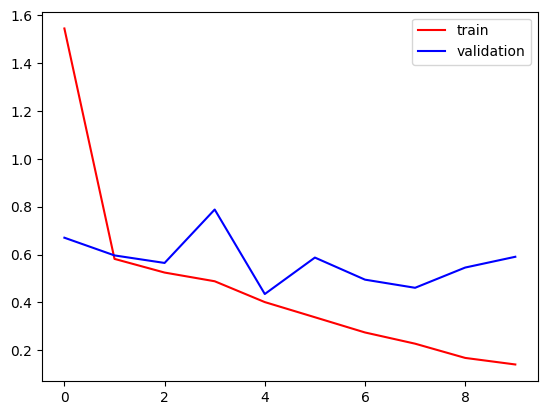

In [ ]:
#visualizing training and validation loss curves
plt.plot(history.history['loss'],color='red',label ='train')
plt.plot(history.history['val_loss'],color='blue',label ='validation')
plt.legend()
plt.show()

In [ ]:
#pridictsion
import cv2

In [ ]:
#test_img = cv2.imread('/content/happy-dog-outdoors.jpg')
test_img = cv2.imread('/content/lonely-pug-royalty.jpg')


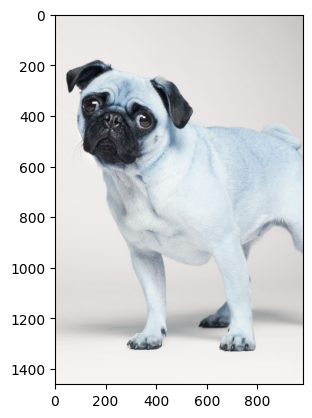

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1461, 980, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)

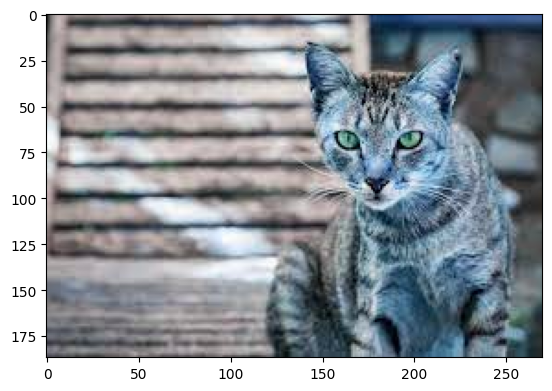

In [ ]:
test_img1 = cv2.imread('/content/cat.jpeg')
plt.imshow(test_img1)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))
test_input = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.1718315]], dtype=float32)